In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [3]:
bike_sharing = pd.read_csv('day.csv')


In [4]:
# Question 7
bike_sharing.drop("dteday", axis=1, inplace=True)

In [5]:
# Question 8
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

bike_sharing_scaler = StandardScaler().fit(bike_sharing)
bike_sharing_standardized = shuffle(pd.DataFrame(bike_sharing_scaler.transform(bike_sharing), columns=bike_sharing.columns))
bike_sharing_standardized.reset_index(inplace=True, drop=True)


In [6]:
# Question 9
from sklearn.feature_selection import f_regression, mutual_info_regression
bike_sharing_x, bike_sharing_y = bike_sharing_standardized.iloc[:, :-3], bike_sharing_standardized.iloc[:, -1]
bike_sharing_mi, bike_sharing_f_test = mutual_info_regression(bike_sharing_x, bike_sharing_y), f_regression(bike_sharing_x, bike_sharing_y)[0]


In [7]:
import numpy as np
bike_sharing_mi /= np.max(bike_sharing_mi)
bike_sharing_f_test /= np.max(bike_sharing_f_test)
list(zip(bike_sharing_x.columns, bike_sharing_mi, bike_sharing_f_test))

[('instant', 1.0, 0.9883023729164755),
 ('season', 0.23930471003298906, 0.29840681168971783),
 ('yr', 0.3038667257933851, 0.7148668340376674),
 ('mnth', 0.41424474722506305, 0.1285191637739684),
 ('holiday', 0.012711070491515857, 0.007091741052579126),
 ('weekday', 0.04814863495901749, 0.006904470107277397),
 ('workingday', 0.029202159235782364, 0.005672541883169612),
 ('weathersit', 0.07177371172571372, 0.14660310061621343),
 ('temp', 0.4294218534782055, 0.9813814493974274),
 ('atemp', 0.5125287076368693, 1.0),
 ('hum', 0.05086615508414742, 0.015466625198484912),
 ('windspeed', 0.060925505191838696, 0.08796240528337734)]

In [8]:
from sklearn.feature_selection import SelectKBest 

def select_features(X_train, y_train, score_func, k=8):
  fs = SelectKBest(score_func=score_func, k=k)
  fs.fit(X_train, y_train)
  X_train_fs = pd.DataFrame(fs.transform(X_train), columns=pd.Index(fs.transform(X_train.columns.to_numpy().reshape(1, -1))[0]))
  return X_train_fs, fs

bike_sharing_x_fs_mi, bike_sharing_fs_mi = select_features(bike_sharing_x, bike_sharing_y, mutual_info_regression)
bike_sharing_x_fs, bike_sharing_fs = select_features(bike_sharing_x, bike_sharing_y, f_regression)


In [9]:
bike_sharing_x

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.606473,1.354375,0.998633,1.588660,-0.171981,0.001366,0.679706,-0.726048,-0.311885,-0.284569,-1.003951,1.724257
1,-0.274854,1.354375,-1.001369,1.298767,-0.171981,0.999661,0.679706,1.110427,-0.503219,-0.435751,-0.037898,1.049686
2,0.905122,0.453512,0.998633,0.139196,-0.171981,-0.497782,0.679706,1.110427,1.232458,1.169434,0.278265,-0.500346
3,0.739262,-0.447350,0.998633,-0.150697,-0.171981,-0.497782,0.679706,1.110427,0.248452,0.316476,-0.102304,0.246482
4,-0.194293,1.354375,-1.001369,1.298767,-0.171981,-0.996930,0.679706,2.946901,-0.261772,-0.179871,1.982032,-0.677026
...,...,...,...,...,...,...,...,...,...,...,...,...
726,-0.696612,0.453512,-1.001369,0.429089,-0.171981,-1.496077,-1.471225,-0.726048,1.350904,1.479512,0.878392,0.142047
727,1.004638,0.453512,0.998633,0.139196,-0.171981,-0.497782,0.679706,-0.726048,1.191457,1.157767,0.535882,-0.323601
728,-0.549707,0.453512,-1.001369,0.718982,-0.171981,0.001366,0.679706,2.946901,0.567346,0.429077,2.031797,-1.206864
729,-0.426497,1.354375,-1.001369,1.008875,-0.171981,-0.996930,0.679706,1.110427,-0.607994,-0.505423,0.934008,-1.383441


In [10]:
bike_sharing_x_fs

,instant,season,yr,mnth,weathersit,temp,atemp,windspeed
0,1.606473,1.354375,0.998633,1.588660,-0.726048,-0.311885,-0.284569,1.724257
1,-0.274854,1.354375,-1.001369,1.298767,1.110427,-0.503219,-0.435751,1.049686
2,0.905122,0.453512,0.998633,0.139196,1.110427,1.232458,1.169434,-0.500346
3,0.739262,-0.447350,0.998633,-0.150697,1.110427,0.248452,0.316476,0.246482
4,-0.194293,1.354375,-1.001369,1.298767,2.946901,-0.261772,-0.179871,-0.677026
...,...,...,...,...,...,...,...,...
726,-0.696612,0.453512,-1.001369,0.429089,-0.726048,1.350904,1.479512,0.142047
727,1.004638,0.453512,0.998633,0.139196,-0.726048,1.191457,1.157767,-0.323601
728,-0.549707,0.453512,-1.001369,0.718982,2.946901,0.567346,0.429077,-1.206864
729,-0.426497,1.354375,-1.001369,1.008875,1.110427,-0.607994,-0.505423,-1.383441


In [11]:
# Q10 ~ Q13 Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bike_sharing_x_fs, bike_sharing_y, test_size = 0.2, random_state=0)
print(X_train_b)
#print(X_test_b)
print(y_train_b)
#print(y_test_b)

#def lin_regplot(X, y, model):
#    plt.scatter(X, y, c='lightblue')
#    plt.plot(X, model.predict(X), color='red', linewidth=2)    
#    return

lin_reg_b = LinearRegression()
lin_reg_b.fit(X_train_b, y_train_b)

print('-------------------------')
print('Intercept:', lin_reg_b.intercept_)
print('Coefficient:', lin_reg_b.coef_)
pred_train_b = lin_reg_b.predict(X_train_b) 
pred_test_b = lin_reg_b.predict(X_test_b) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_b, pred_train_b)))
print('r2 score of train_data:', r2_score(y_train_b, pred_train_b))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_b, pred_test_b)))
print('r2 score of test_data:', r2_score(y_test_b, pred_test_b))
#print('r2 score of test_data:', lin_reg_b.score(X_test_b, y_test_b))
print('-------------------------')
rr = Ridge(alpha=0.001)
rr.fit(X_train_b, y_train_b)
print('Intercept:', rr.intercept_)
print('Coefficient:', rr.coef_)
pred_train_rr_b= rr.predict(X_train_b)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train_b, pred_train_rr_b)))
print('r2 score of train_data:', r2_score(y_train_b, pred_train_rr_b))

pred_test_rr_b= rr.predict(X_test_b)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_b, pred_test_rr_b))) 
print('r2 score of test_data:', r2_score(y_test_b, pred_test_rr_b))

print('-------------------------')
model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train_b, y_train_b)
print('Intercept:', model_lasso.intercept_)
print('Coefficient:', model_lasso.coef_)
pred_train_lasso= model_lasso.predict(X_train_b)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train_b,pred_train_lasso)))
print('r2 score of train_data:', r2_score(y_train_b, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test_b)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_b,pred_test_lasso))) 
print('r2 score of test_data:', r2_score(y_test_b, pred_test_lasso))

print('-------------------------')

      instant    season        yr  ...      temp     atemp  windspeed
97  -1.326880 -0.447350 -1.001369  ... -1.324810 -1.375594  -0.079879
503 -0.165860  1.354375 -1.001369  ... -0.197992 -0.113933   0.238464
642  1.070982  0.453512  0.998633  ...  1.264350  1.243018  -0.275399
498  0.369631 -1.348213  0.998633  ...  0.271231  0.359024  -0.363733
303  1.047288  0.453512  0.998633  ...  1.423792  1.382588  -0.444009
..        ...       ...       ...  ...       ...       ...        ...
707 -0.056866  1.354375 -1.001369  ... -0.598887 -0.478355  -1.664609
192 -1.596995 -1.348213 -1.001369  ... -1.633793 -1.610246  -0.582624
629 -1.630167 -1.348213 -1.001369  ... -2.384871 -2.427296  -0.239089
559 -0.132688  1.354375 -1.001369  ... -0.899555 -0.769139  -1.375533
684  1.151542  0.453512  0.998633  ...  1.469351  1.320519  -0.283469

[584 rows x 8 columns]
97    -1.452229
503   -0.740410
642    1.177575
498    0.851626
303    1.436888
         ...   
707   -0.389666
192   -1.759581
629   -1

In [12]:
import statsmodels.api as sm
from scipy import stats

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bike_sharing_x_fs, bike_sharing_y, test_size = 0.2, random_state=0)

X2 = sm.add_constant(X_train_b)
bike = sm.OLS(y_train_b, X2)
bike2 = bike.fit()
print(bike2.summary())

lin_reg_b = LinearRegression()
lin_reg_b.fit(X_train_b,y_train_b)
params = np.append(lin_reg_b.intercept_,lin_reg_b.coef_)
predictions = lin_reg_b.predict(X_train_b)

newX = pd.DataFrame({"Constant":np.ones(len(X_train_b))}).join(pd.DataFrame(X_train_b.reset_index(drop=True)))
MSE = (sum((y_train_b-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

sd_b = np.round(sd_b,8)
ts_b = np.round(ts_b,8)
p_values = np.round(p_values,8)
params = np.round(params,9)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["P-values"] = [params,sd_b,ts_b,p_values]
print(myDF3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     262.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.56e-186
Time:                        22:41:58   Log-Likelihood:                -374.49
No. Observations:                 584   AIC:                             767.0
Df Residuals:                     575   BIC:                             806.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.019     -0.380      0.7

In [13]:
#Q14 find important features
from sklearn.preprocessing import PolynomialFeatures
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bike_sharing_x_fs, bike_sharing_y, test_size = 0.2, random_state=0)

print(X_train_b.shape)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train_b)
print(X_poly_train)
# Linear regression
#poly_reg = LinearRegression()
#poly_reg.fit(X_poly_train, y_train_b)

bike = sm.OLS(y_train_b, X_poly_train)
bike2 = bike.fit()
print(bike2.summary())

(584, 8)
[[-1.32688011 -0.44735043 -1.00136893 ...  1.89225804  0.10988096
   0.00638064]
 [-0.16586001  1.354375   -1.00136893 ...  0.01298078 -0.02716894
   0.05686496]
 [ 1.0709818   0.45351228  0.99863295 ...  1.54509273 -0.34232546
   0.07584446]
 ...
 [-1.63016699 -1.34821315 -1.00136893 ...  5.89176653  0.58033984
   0.05716356]
 [-0.13268801  1.354375   -1.00136893 ...  0.59157435  1.0579754
   1.89209006]
 [ 1.15154238  0.45351228  0.99863295 ...  1.74376914 -0.37432605
   0.08035467]]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     81.49
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.97e-207
Time:                        22:41:58   Log-Likelihood:                -235.31
No. Observations:         

In [14]:
num = np.array([(2),(3),(5),(7),(11),(13),(17),(19)])
#print(num.shape)
num1 = num.reshape(1,8)
np.set_printoptions(threshold= 1300)
#print(num1.shape)
#print(num1)
poly_features_num = PolynomialFeatures(degree=4, include_bias=False)
#poly_features_num = poly_features_num.reshape(-1,1)
X_poly_train_num = poly_features_num.fit_transform(num1)

print(X_poly_train_num)

[[2.00000e+00 3.00000e+00 5.00000e+00 7.00000e+00 1.10000e+01 1.30000e+01
  1.70000e+01 1.90000e+01 4.00000e+00 6.00000e+00 1.00000e+01 1.40000e+01
  2.20000e+01 2.60000e+01 3.40000e+01 3.80000e+01 9.00000e+00 1.50000e+01
  2.10000e+01 3.30000e+01 3.90000e+01 5.10000e+01 5.70000e+01 2.50000e+01
  3.50000e+01 5.50000e+01 6.50000e+01 8.50000e+01 9.50000e+01 4.90000e+01
  7.70000e+01 9.10000e+01 1.19000e+02 1.33000e+02 1.21000e+02 1.43000e+02
  1.87000e+02 2.09000e+02 1.69000e+02 2.21000e+02 2.47000e+02 2.89000e+02
  3.23000e+02 3.61000e+02 8.00000e+00 1.20000e+01 2.00000e+01 2.80000e+01
  4.40000e+01 5.20000e+01 6.80000e+01 7.60000e+01 1.80000e+01 3.00000e+01
  4.20000e+01 6.60000e+01 7.80000e+01 1.02000e+02 1.14000e+02 5.00000e+01
  7.00000e+01 1.10000e+02 1.30000e+02 1.70000e+02 1.90000e+02 9.80000e+01
  1.54000e+02 1.82000e+02 2.38000e+02 2.66000e+02 2.42000e+02 2.86000e+02
  3.74000e+02 4.18000e+02 3.38000e+02 4.42000e+02 4.94000e+02 5.78000e+02
  6.46000e+02 7.22000e+02 2.70000e+01 

r2 score of test_data: 0.7982746322193077
r2 score of test_data: 0.8591523434421178
r2 score of test_data: 0.8585266785404482
r2 score of test_data: -2.6664546532520395e+20
r2 score of test_data: -22418.5480671861
r2 score of test_data: -967.1870506691191
Best degree 2 with RMSE 0.3886481322254624


Text(0, 0.5, 'RMSE')

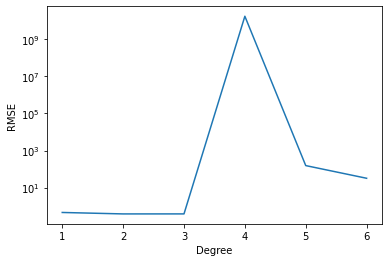

In [15]:
#Q14~Q16 Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bike_sharing_x_fs, bike_sharing_y, test_size = 0.2, random_state=0)

#model_b=make_pipeline(PolynomialFeatures(6),linear_model.LinearRegression())
#model_b.fit(X_train_b, y_train_b)
#print('r2 score of train_data:', model_b.score(X_train_b, y_train_b))


rmses = []
degrees = np.arange(1, 7)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train_b)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train_b)
    #print('r2 score of train_data:', poly_reg.score(X_poly_train, y_train_b))
    # Compare with test data
    X_poly_test = poly_features.fit_transform(X_test_b)
    print('r2 score of test_data:', poly_reg.score(X_poly_test, y_test_b))
    poly_predict = poly_reg.predict(X_poly_test)
    poly_mse = mean_squared_error(y_test_b, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    #print(rmses)
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

#plt.plot(degrees, rmses)
#plt.plot()

#plt.xlabel("Degree")
#plt.ylabel("RMSE")
#plt.title("Degree vs RMSE")
#plt.show()


In [16]:
from sklearn.neural_network import MLPRegressor
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(bike_sharing_x_fs, bike_sharing_y, test_size = 0.2, random_state=0)
mlpc = MLPRegressor(hidden_layer_sizes=(50, 20), activation='relu', alpha=0.0001, solver='adam', verbose=10, tol=1e-4, random_state=1, max_iter=500)
mlpc.fit(X_train_b, y_train_b)

mlpc_train_b = mlpc.predict(X_train_b) 
mlpc_test_b = mlpc.predict(X_test_b) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_b, mlpc_train_b)))
print('r2 score of train_data:', r2_score(y_train_b, mlpc_train_b))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_b, mlpc_test_b)))
print('r2 score of test_data:', r2_score(y_test_b, mlpc_test_b))

Iteration 1, loss = 0.53809277
Iteration 2, loss = 0.45710727
Iteration 3, loss = 0.38972049
Iteration 4, loss = 0.33103786
Iteration 5, loss = 0.28110299
Iteration 6, loss = 0.23734832
Iteration 7, loss = 0.20123304
Iteration 8, loss = 0.17165257
Iteration 9, loss = 0.14795253
Iteration 10, loss = 0.13066619
Iteration 11, loss = 0.11952544
Iteration 12, loss = 0.11248601
Iteration 13, loss = 0.10771599
Iteration 14, loss = 0.10517560
Iteration 15, loss = 0.10193430
Iteration 16, loss = 0.09850685
Iteration 17, loss = 0.09488560
Iteration 18, loss = 0.09142271
Iteration 19, loss = 0.08825185
Iteration 20, loss = 0.08559314
Iteration 21, loss = 0.08315506
Iteration 22, loss = 0.08096410
Iteration 23, loss = 0.07893152
Iteration 24, loss = 0.07722594
Iteration 25, loss = 0.07560721
Iteration 26, loss = 0.07411434
Iteration 27, loss = 0.07266428
Iteration 28, loss = 0.07134445
Iteration 29, loss = 0.07022449
Iteration 30, loss = 0.06911695
Iteration 31, loss = 0.06806253
Iteration 32, los

In [17]:
print(bike_sharing_fs)

SelectKBest(k=8, score_func=<function f_regression at 0x7f154c814320>)


In [18]:
# Question 21-23 (Random Forest)
# dataset: bike_sharing
import itertools
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

all_data = [bike_sharing_x_fs] #CHANGE HERE FOR YOUR DATASET!
all_label = [bike_sharing_y] #CHANGE HERE FOR YOUR DATASET!
result = {}
model_max_depth_4 = []
param_grid = {'max_depth': [4, 8, 15, 25, 30],
              'n_estimators': [30, 50, 70, 90, 110],
              'max_features': [0.1, 0.3, 0.5, 0.7, 0.9]}
all_param_combo = list(itertools.product(param_grid['max_depth'], param_grid['n_estimators'], param_grid['max_features']))
print(all_param_combo)
for data, label in zip(all_data, all_label):
    # when using the out of bags trick, it is not neccesary to split the dataset.

    for param in tqdm(all_param_combo):
        rf = RandomForestRegressor(max_depth=param[0], n_estimators=param[1], max_features=param[2], oob_score=True)
        rf.fit(data, label)
        result[param]=rf.oob_score_

        # save the model for Question 23
        if param[0]==4:
            model_max_depth_4.append(rf)


  0%|          | 0/125 [00:00<?, ?it/s]

[(4, 30, 0.1), (4, 30, 0.3), (4, 30, 0.5), (4, 30, 0.7), (4, 30, 0.9), (4, 50, 0.1), (4, 50, 0.3), (4, 50, 0.5), (4, 50, 0.7), (4, 50, 0.9), (4, 70, 0.1), (4, 70, 0.3), (4, 70, 0.5), (4, 70, 0.7), (4, 70, 0.9), (4, 90, 0.1), (4, 90, 0.3), (4, 90, 0.5), (4, 90, 0.7), (4, 90, 0.9), (4, 110, 0.1), (4, 110, 0.3), (4, 110, 0.5), (4, 110, 0.7), (4, 110, 0.9), (8, 30, 0.1), (8, 30, 0.3), (8, 30, 0.5), (8, 30, 0.7), (8, 30, 0.9), (8, 50, 0.1), (8, 50, 0.3), (8, 50, 0.5), (8, 50, 0.7), (8, 50, 0.9), (8, 70, 0.1), (8, 70, 0.3), (8, 70, 0.5), (8, 70, 0.7), (8, 70, 0.9), (8, 90, 0.1), (8, 90, 0.3), (8, 90, 0.5), (8, 90, 0.7), (8, 90, 0.9), (8, 110, 0.1), (8, 110, 0.3), (8, 110, 0.5), (8, 110, 0.7), (8, 110, 0.9), (15, 30, 0.1), (15, 30, 0.3), (15, 30, 0.5), (15, 30, 0.7), (15, 30, 0.9), (15, 50, 0.1), (15, 50, 0.3), (15, 50, 0.5), (15, 50, 0.7), (15, 50, 0.9), (15, 70, 0.1), (15, 70, 0.3), (15, 70, 0.5), (15, 70, 0.7), (15, 70, 0.9), (15, 90, 0.1), (15, 90, 0.3), (15, 90, 0.5), (15, 90, 0.7), (15,

100%|██████████| 125/125 [00:22<00:00,  5.64it/s]


(15, 110, 0.3)


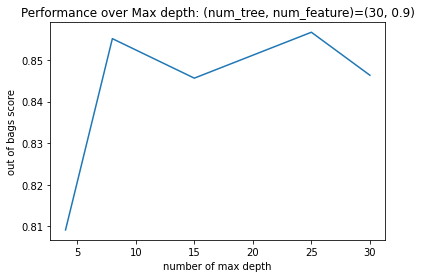

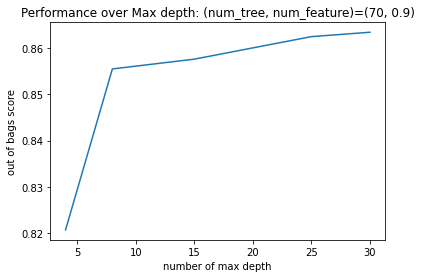

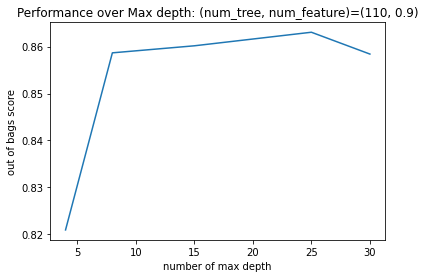

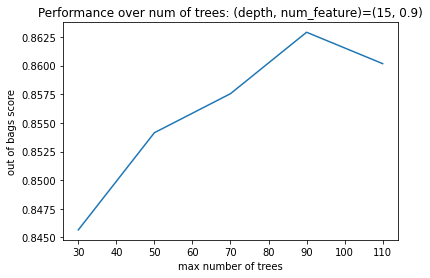

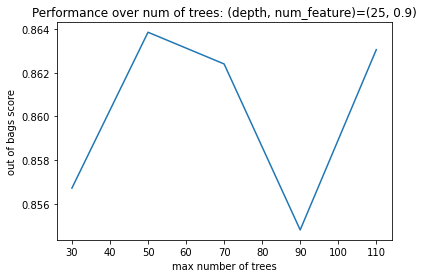

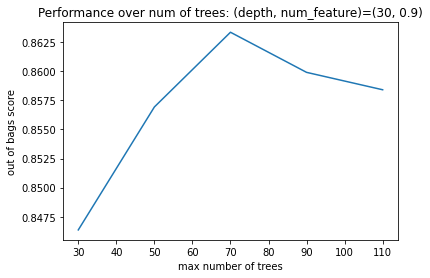

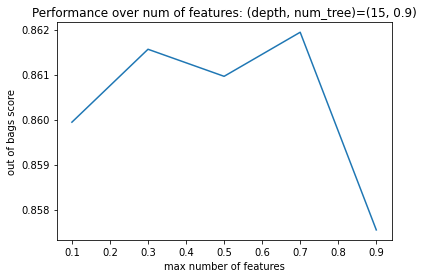

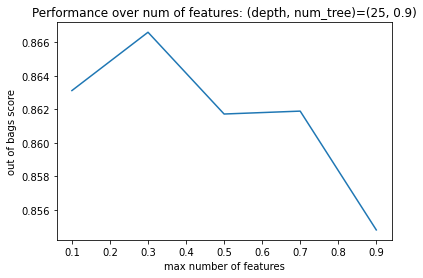

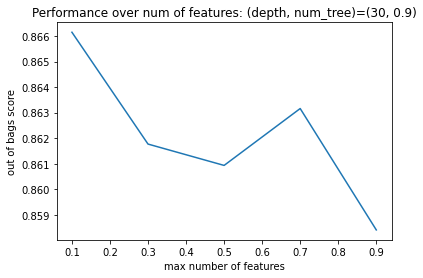

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt


# the best hyperparameter for bike dataset
max_key = max(result, key=result.get)
print(max_key)

# plot for max depth
x1, x2, x3 = [], [], []
score1, score2, score3 = [], [], []
for param in result.keys():
    if param[1]==30 and param[2]==0.9:
        x1.append(param[0])
        score1.append(result[param])
    if param[1]==70 and param[2]==0.9:
        x2.append(param[0])
        score2.append(result[param])
    if param[1]==110 and param[2]==0.9:
        x3.append(param[0])
        score3.append(result[param])

plt.title('Performance over Max depth: (num_tree, num_feature)=(30, 0.9)')
plt.plot(x1, score1)
plt.xlabel('number of max depth')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over Max depth: (num_tree, num_feature)=(70, 0.9)')
plt.plot(x2, score2)
plt.xlabel('number of max depth')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over Max depth: (num_tree, num_feature)=(110, 0.9)')
plt.plot(x3, score3)
plt.xlabel('number of max depth')
plt.ylabel('out of bags score')
plt.show()

# plot for num of trees

x1, x2, x3 = [], [], []
score1, score2, score3 = [], [], []
for param in result.keys():
    if param[0]==15 and param[2]==0.9: #param order : depth, tree, features
        x1.append(param[1])
        score1.append(result[param])
    if param[0]==25 and param[2]==0.9:
        x2.append(param[1])
        score2.append(result[param])
    if param[0]==30 and param[2]==0.9:
        x3.append(param[1])
        score3.append(result[param])

plt.title('Performance over num of trees: (depth, num_feature)=(15, 0.9)')
plt.plot(x1, score1)
plt.xlabel('max number of trees')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over num of trees: (depth, num_feature)=(25, 0.9)')
plt.plot(x2, score2)
plt.xlabel('max number of trees')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over num of trees: (depth, num_feature)=(30, 0.9)')
plt.plot(x3, score3)
plt.xlabel('max number of trees')
plt.ylabel('out of bags score')
plt.show()

# plot for depth of each tree
x1, x2, x3 = [], [], []
score1, score2, score3 = [], [], []
for param in result.keys():
    if param[0]==15 and param[1]==70: #param order : depth, tree, features
        x1.append(param[2])
        score1.append(result[param])
    if param[0]==25 and param[1]==90:
        x2.append(param[2])
        score2.append(result[param])
    if param[0]==30 and param[1]==110:
        x3.append(param[2])
        score3.append(result[param])

plt.title('Performance over num of features: (depth, num_tree)=(15, 0.9)')
plt.plot(x1, score1)
plt.xlabel('max number of features')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over num of features: (depth, num_tree)=(25, 0.9)')
plt.plot(x2, score2)
plt.xlabel('max number of features')
plt.ylabel('out of bags score')
plt.show()

plt.title('Performance over num of features: (depth, num_tree)=(30, 0.9)')
plt.plot(x3, score3)
plt.xlabel('max number of features')
plt.ylabel('out of bags score')
plt.show()

# random forest visualize
from sklearn import tree



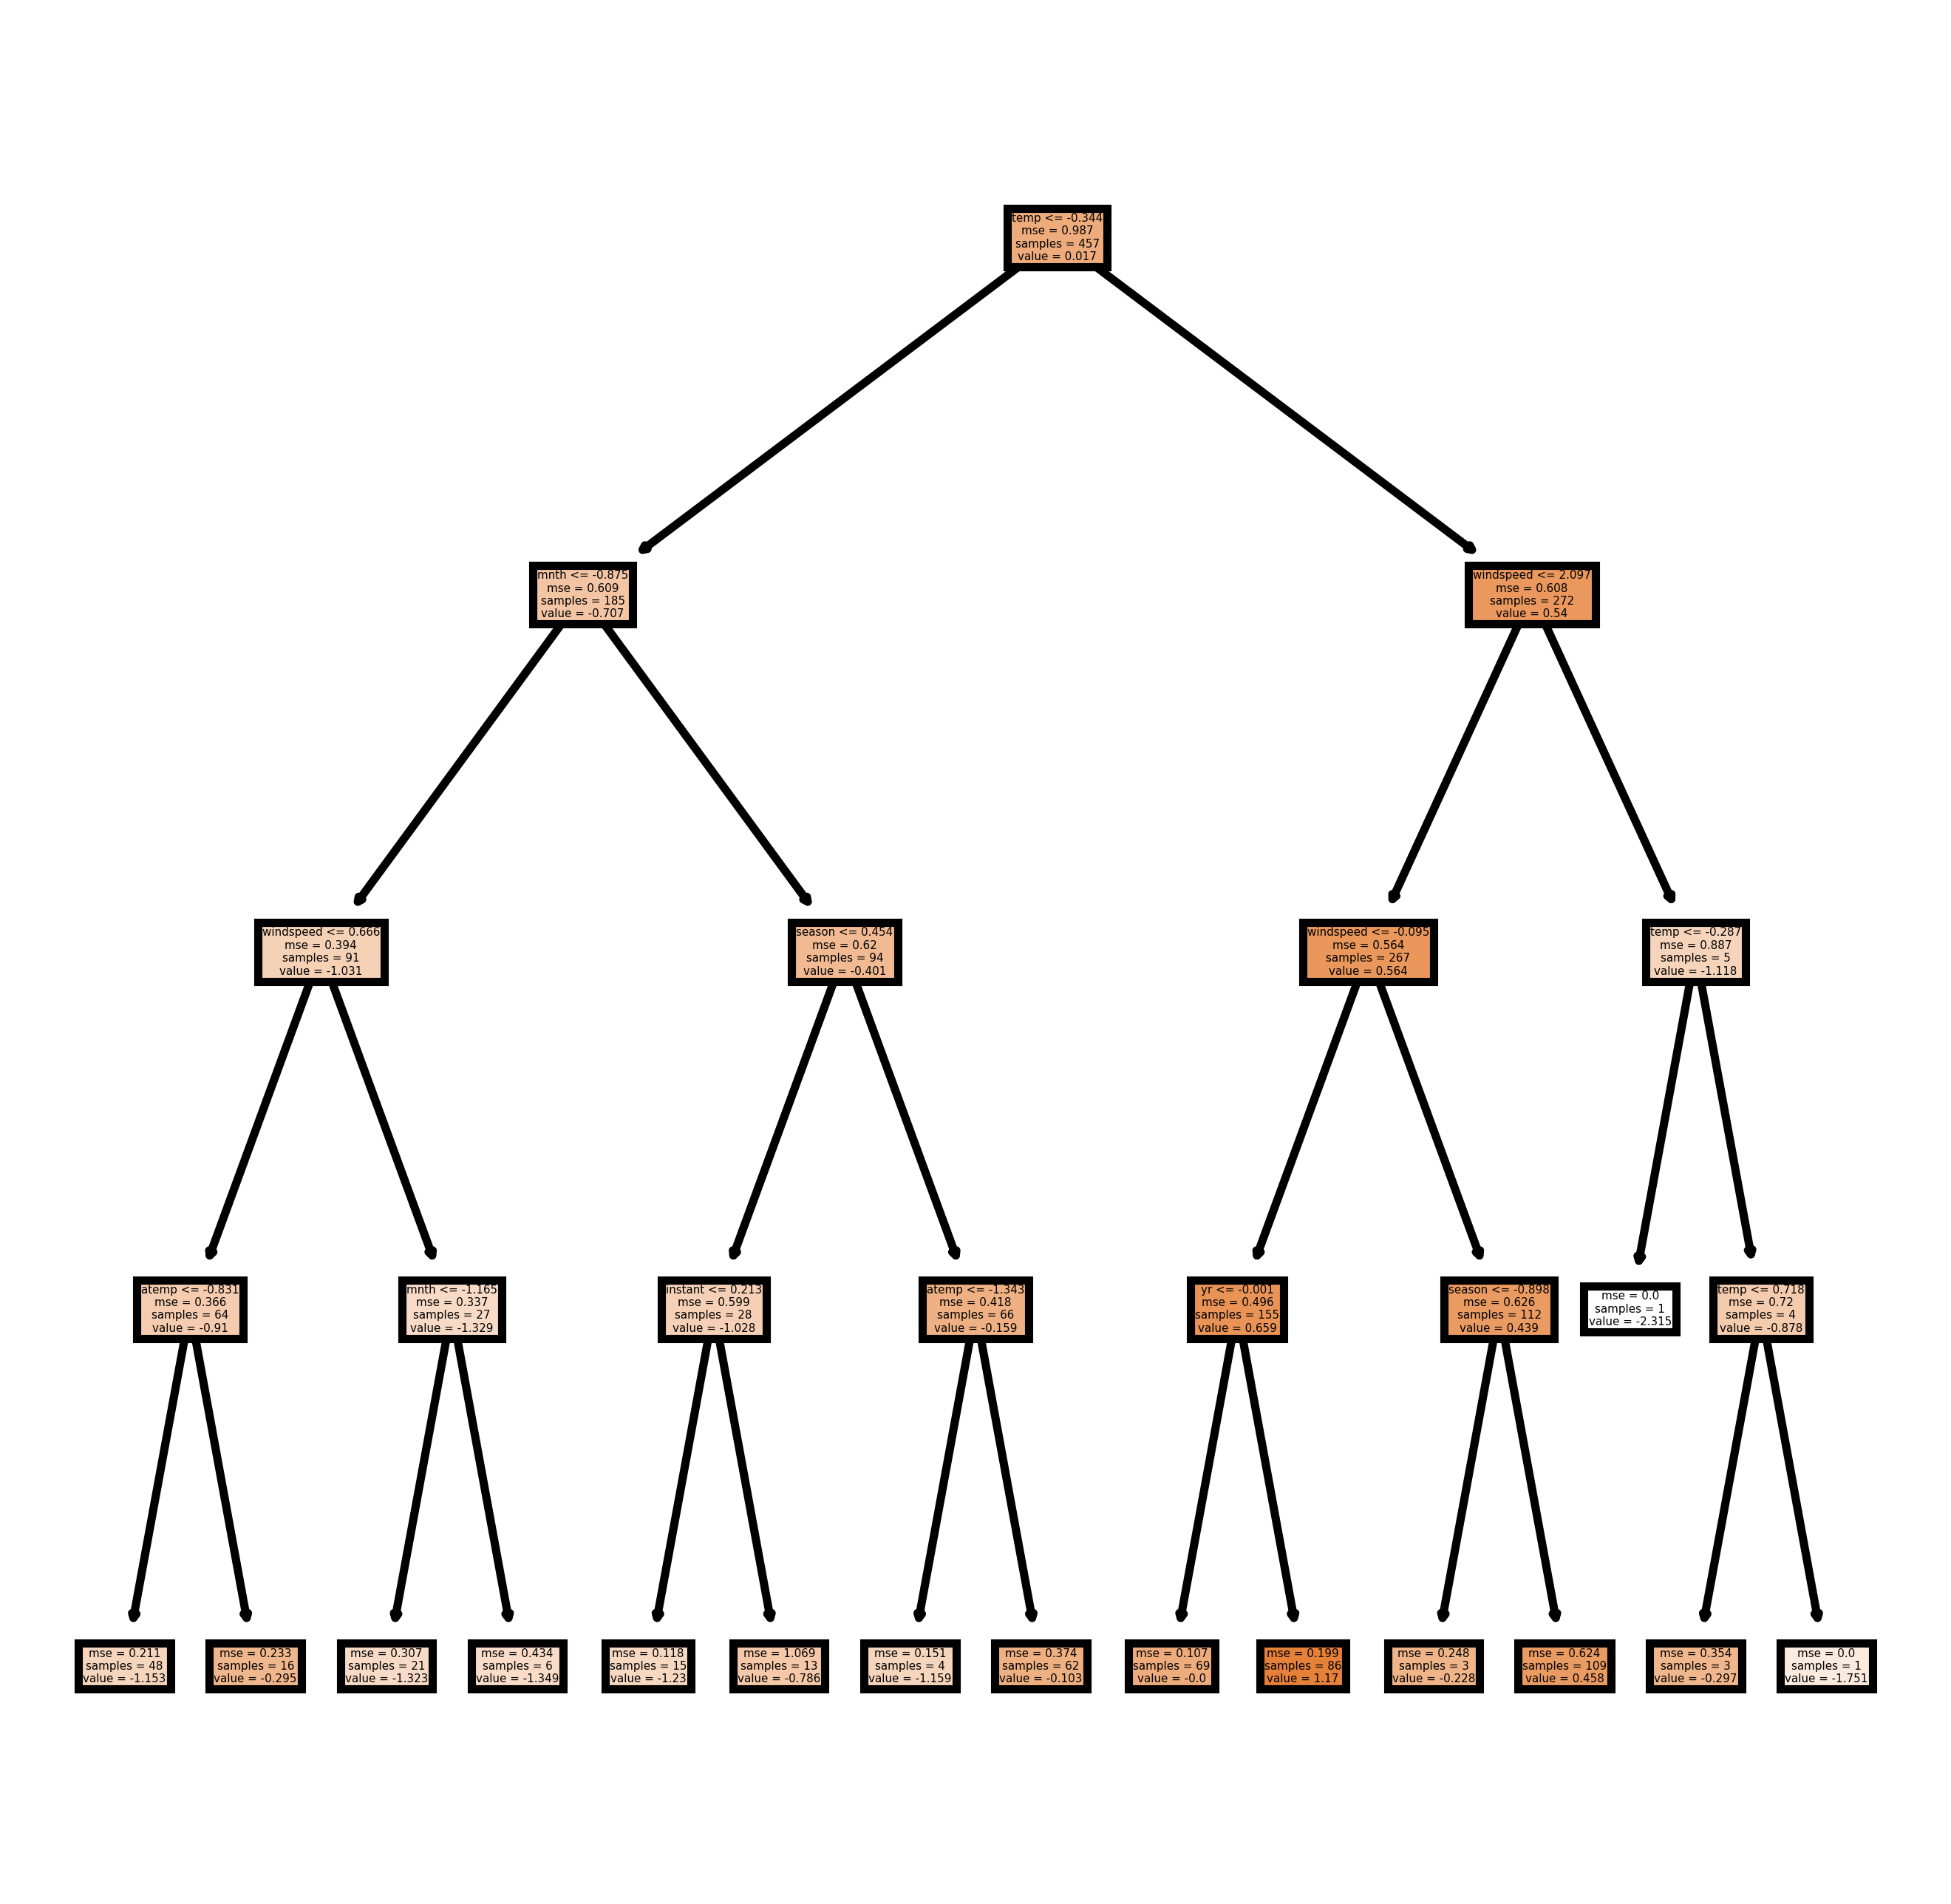

In [22]:
# random forest visualize
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model_max_depth_4[0].estimators_[0],
               feature_names = bike_sharing_x_fs.columns, 
               class_names='total count',
               filled = True);

In [ ]:
!pip install lightgbm
!pip install catboost
!pip install ipywidgets
!pip install scikit-optimize

In [ ]:
min(result.items(), key=lambda x: x[1])